In [ ]:
#####데이터 Unzip#####

In [1]:
import zipfile
import os
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [2]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 압축 파일 경로와 압축 해제 경로 지정
zip_path1 = '/content/drive/MyDrive/test.zip'
extract_path1 = '/content/drive/MyDrive/100_Sports_Image_Classification/test'
zip_path2 = '/content/drive/MyDrive/train.zip'
extract_path2 = '/content/drive/MyDrive/100_Sports_Image_Classification/train'
zip_path3 = '/content/drive/MyDrive/valid.zip'
extract_path3 = '/content/drive/MyDrive/100_Sports_Image_Classification/valid'
zip_file = zipfile.ZipFile(zip_path1)
zip_file.extractall(extract_path1)
zip_file = zipfile.ZipFile(zip_path2)
zip_file.extractall(extract_path2)
zip_file = zipfile.ZipFile(zip_path3)
zip_file.extractall(extract_path3)

In [4]:
# 이미지 파일이 정상적으로 저장되어 있는지 확인
top_dir = '/content/drive/MyDrive/Deep_Learning/100_Sports_Image_Classification/train'
bad_files = []
for root, dirs, files in os.walk(top_dir):
    for file in files:
        try:
            img_path = os.path.join(root, file)
            img = Image.open(img_path)
            img.verify()  # 이미지 파일이 유효한지 확인
        except (IOError, SyntaxError) as e:
            bad_files.append(img_path)
            print(f'Bad file: {img_path} - {e}')

if not bad_files:
    print("모든 이미지가 정상입니다.")
else:
    print(f"총 {len(bad_files)}개의 문제가 있는 이미지 파일이 발견되었습니다.")

모든 이미지가 정상입니다.


In [ ]:
#데이터 확인
tennis = '/content/drive/MyDrive/Deep_Learning/100_Sports_Image_Classification/train/tennis/001.jpg'

# 이미지를 읽고 BGR에서 RGB로 변환
image = cv2.imread(tennis)
if image is not None:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(1, figsize=(15, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('tennis')
    plt.xticks([]) , plt.yticks([])
    plt.show()
else:
    print(f"Error: Unable to read the image file from the path {tennis}")

In [ ]:
##### 모델 구축 #####

In [ ]:
# 라이브러리
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, ReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### Binary Classification ###

In [ ]:
# 이미지 크기 설정
width, height = 224, 224
# ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)

train_generator = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Deep_Learning/100_Sports_Image_Classification/train_binary',
    target_size=(width, height),
    class_mode='binary',
    batch_size=32
)

test_generator = test_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Deep_Learning/100_Sports_Image_Classification/test_binary',
    target_size=(width, height),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

valid_generator = test_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Deep_Learning/100_Sports_Image_Classification/valid_binary',
    target_size=(width, height),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 303 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
# 모델 구축
model_binary = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, 3)),
    MaxPool2D((2, 2)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])
# 모델 컴파일
model_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                        

In [ ]:
# 모델 학습
history = model_binary.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator
)

Epoch 1/50
10/10 [==============================] - 75s 6s/step - loss: 0.4566 - accuracy: 0.7723 - val_loss: 0.9513 - val_accuracy: 0.5000
Epoch 2/50
10/10 [==============================] - 5s 450ms/step - loss: 0.2659 - accuracy: 0.9076 - val_loss: 0.4467 - val_accuracy: 0.8000
Epoch 3/50
10/10 [==============================] - 6s 628ms/step - loss: 0.2710 - accuracy: 0.8878 - val_loss: 0.3584 - val_accuracy: 1.0000
Epoch 4/50
10/10 [==============================] - 5s 471ms/step - loss: 0.2034 - accuracy: 0.9340 - val_loss: 0.4037 - val_accuracy: 0.8000
Epoch 5/50
10/10 [==============================] - 6s 645ms/step - loss: 0.1475 - accuracy: 0.9505 - val_loss: 0.7553 - val_accuracy: 0.5000
Epoch 6/50
10/10 [==============================] - 4s 439ms/step - loss: 0.1310 - accuracy: 0.9637 - val_loss: 0.7237 - val_accuracy: 0.5000
Epoch 7/50
10/10 [==============================] - 5s 492ms/step - loss: 0.0890 - accuracy: 0.9802 - val_loss: 0.9331 - val_accuracy: 0.5000
Epoch 8/

In [ ]:
# Validation 데이터셋에 대한 예측
valid_generator.reset()
valid_preds = model_binary.predict(valid_generator)
valid_preds = (valid_preds > 0.5).astype(int)

# 실제 라벨
valid_true = valid_generator.classes

# 분류 리포트 생성
valid_report = classification_report(valid_true, valid_preds, target_names=valid_generator.class_indices.keys())
print(valid_report)

1/1 [==============================] - 0s 209ms/step
              precision    recall  f1-score   support

      hockey       1.00      1.00      1.00         5
      tennis       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



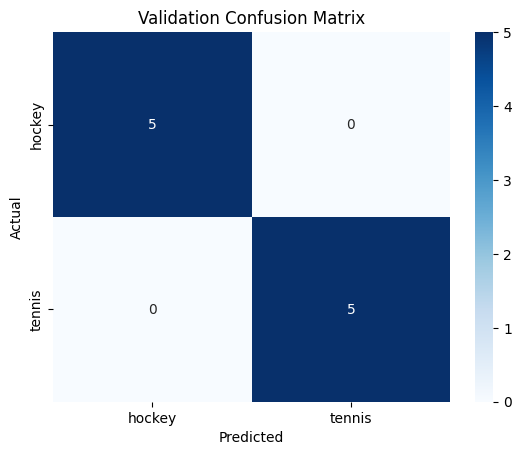

{'hockey': 0, 'tennis': 1}


In [ ]:
# 혼동 행렬 생성
valid_cm = confusion_matrix(valid_true, valid_preds)
sns.heatmap(valid_cm, annot=True, fmt='d', cmap='Blues', xticklabels=valid_generator.class_indices.keys(), yticklabels=valid_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# 클래스 인덱스 확인
print(valid_generator.class_indices)

1/1 [==============================] - 0s 35ms/step


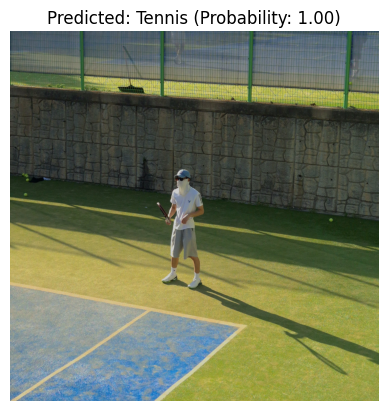

In [ ]:
# 직접 찍은 사진 분류

# 이미지 전처리 함수
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(height, width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img_array

# 이미지 예측 함수
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    pred = model_binary.predict(img_array)
    pred_class = 'Tennis' if pred > 0.5 else 'Hockey'
    pred_prob = pred[0][0]  # 예측 확률 값

    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f'Predicted: {pred_class} (Probability: {pred_prob:.2f})')
    plt.axis('off')
    plt.show()

# 예시로 사용할 이미지 경로
img_path = '/content/drive/MyDrive/Deep_Learning/100_Sports_Image_Classification/tennis.jpg'  # 실제 찍은 사진의 경로로 변경
predict_image(img_path)

In [ ]:
### Ten classes classification ###

In [ ]:
#############
## Model 1 ##
#############

In [ ]:
# 이미지 크기 설정
width, height = 224, 224
class_num = 10

# 데이터 증강 및 전처리
train_datagen = ImageDataGenerator(rescale=1/255.0,)
test_datagen = ImageDataGenerator(rescale=1/255.0)

# 트레이닝 데이터 로드
train_generator = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Deep_Learning/100_Sports_Image_Classification/train_ten',
    target_size=(width, height),
    class_mode='categorical',
    batch_size=32
)

# 테스트 데이터 로드
test_generator = test_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Deep_Learning/100_Sports_Image_Classification/test_ten',
    target_size=(width, height),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

# Validation 데이터 로드
valid_generator = test_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Deep_Learning/100_Sports_Image_Classification/valid_ten',
    target_size=(width, height),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1465 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [ ]:
# 모델 정의
model_ten = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(height, width, 3)),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(class_num, activation='softmax')
])
# 모델 컴파일
model_ten.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 모델 요약
model_ten.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 256)       0

In [ ]:
# 모델 학습
history = model_ten.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
)

Epoch 1/20
46/46 [==============================] - 357s 8s/step - loss: 2.2920 - accuracy: 0.1420 - val_loss: 2.2066 - val_accuracy: 0.1400
Epoch 2/20
46/46 [==============================] - 47s 1s/step - loss: 2.0267 - accuracy: 0.2710 - val_loss: 1.7504 - val_accuracy: 0.4000
Epoch 3/20
46/46 [==============================] - 47s 1s/step - loss: 1.8280 - accuracy: 0.3679 - val_loss: 1.5425 - val_accuracy: 0.5400
Epoch 4/20
46/46 [==============================] - 47s 1s/step - loss: 1.5521 - accuracy: 0.4546 - val_loss: 1.3329 - val_accuracy: 0.5400
Epoch 5/20
46/46 [==============================] - 47s 1s/step - loss: 1.2002 - accuracy: 0.5959 - val_loss: 1.1315 - val_accuracy: 0.6200
Epoch 6/20
46/46 [==============================] - 47s 1s/step - loss: 0.9557 - accuracy: 0.6799 - val_loss: 1.2221 - val_accuracy: 0.7200
Epoch 7/20
46/46 [==============================] - 47s 1s/step - loss: 0.5998 - accuracy: 0.7986 - val_loss: 1.1035 - val_accuracy: 0.6600
Epoch 8/20
46/46 [=

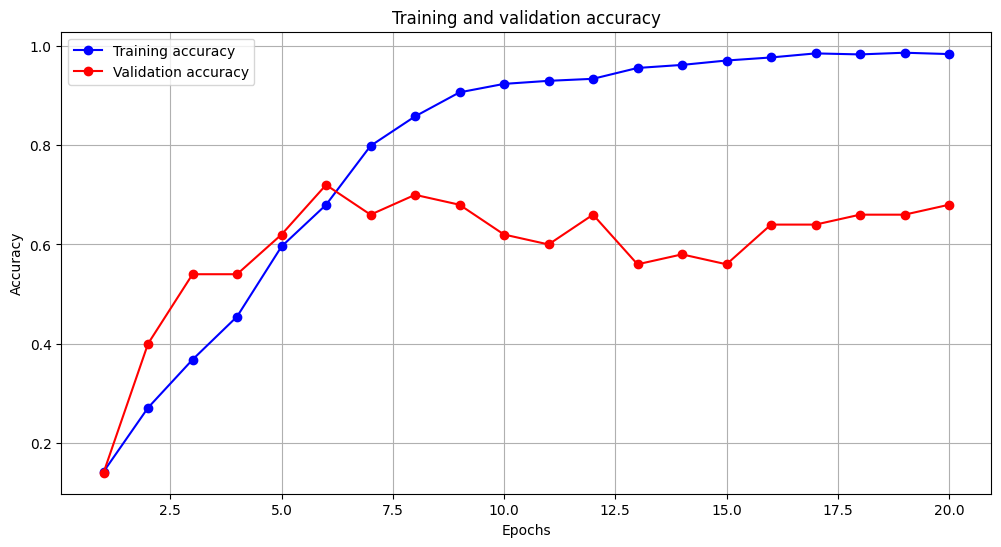

In [ ]:
# 학습 과정에서의 정확도와 검증 정확도 값을 history 객체로부터 추출
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# 에포크 값을 생성
epochs = range(1, len(acc) + 1)

# 정확도 플롯
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#############
## Model 2 ##
#############

In [ ]:
# 모델 정의
model_ten = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='tanh'),
    Dropout(0.3),
    Dense(class_num, activation='softmax')
])
# 모델 컴파일
model_ten.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model_ten.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 26, 26, 128)     

In [ ]:
# 모델 학습
history = model_ten.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

Epoch 1/15
46/46 [==============================] - 23s 464ms/step - loss: 2.2929 - accuracy: 0.1208 - val_loss: 2.2807 - val_accuracy: 0.1300
Epoch 2/15
46/46 [==============================] - 21s 456ms/step - loss: 2.2181 - accuracy: 0.1966 - val_loss: 2.1596 - val_accuracy: 0.2700
Epoch 3/15
46/46 [==============================] - 21s 459ms/step - loss: 2.2107 - accuracy: 0.1836 - val_loss: 2.0888 - val_accuracy: 0.2200
Epoch 4/15
46/46 [==============================] - 21s 455ms/step - loss: 2.1024 - accuracy: 0.2396 - val_loss: 1.9465 - val_accuracy: 0.3200
Epoch 5/15
46/46 [==============================] - 21s 457ms/step - loss: 1.9524 - accuracy: 0.2969 - val_loss: 1.7332 - val_accuracy: 0.4300
Epoch 6/15
46/46 [==============================] - 21s 453ms/step - loss: 1.8420 - accuracy: 0.3276 - val_loss: 1.6011 - val_accuracy: 0.4500
Epoch 7/15
46/46 [==============================] - 21s 453ms/step - loss: 1.7368 - accuracy: 0.4007 - val_loss: 1.5367 - val_accuracy: 0.4700

In [ ]:
# history 객체 초기화
combined_history = history.history

# 두번째 학습
add_history = model_ten.fit(
    train_generator,
    initial_epoch=15,
    epochs=16,
    validation_data=test_generator,
)

# 두번째 학습 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 16/16
46/46 [==============================] - 21s 456ms/step - loss: 0.6421 - accuracy: 0.8034 - val_loss: 1.2846 - val_accuracy: 0.6600


In [ ]:
# 세번째 학습
add_history = model_ten.fit(
    train_generator,
    initial_epoch=16,
    epochs=18,
    validation_data=test_generator,
)

# 세번째 학습 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 17/18
46/46 [==============================] - 21s 457ms/step - loss: 0.5577 - accuracy: 0.8362 - val_loss: 1.1517 - val_accuracy: 0.6600
Epoch 18/18
46/46 [==============================] - 21s 452ms/step - loss: 0.4647 - accuracy: 0.8608 - val_loss: 1.3076 - val_accuracy: 0.6700


In [ ]:
# 네번째 학습
add_history = model_ten.fit(
    train_generator,
    initial_epoch=18,
    epochs=20,
    validation_data=test_generator,
)

# 네번째 학습 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 19/20
46/46 [==============================] - 21s 448ms/step - loss: 0.3778 - accuracy: 0.8881 - val_loss: 1.1517 - val_accuracy: 0.6900
Epoch 20/20
46/46 [==============================] - 21s 444ms/step - loss: 0.3496 - accuracy: 0.9092 - val_loss: 1.3324 - val_accuracy: 0.6600


In [ ]:
# 학습 5
add_history = model_ten.fit(
    train_generator,
    initial_epoch=20,
    epochs=22,
    validation_data=test_generator,
)

# 학습 5 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 21/22
46/46 [==============================] - 21s 457ms/step - loss: 0.3220 - accuracy: 0.9106 - val_loss: 1.3718 - val_accuracy: 0.6800
Epoch 22/22
46/46 [==============================] - 21s 451ms/step - loss: 0.3428 - accuracy: 0.9126 - val_loss: 1.3207 - val_accuracy: 0.6700


In [ ]:
# 학습 6
add_history = model_ten.fit(
    train_generator,
    initial_epoch=22,
    epochs=24,
    validation_data=test_generator,
)

# 학습 6 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 23/24
46/46 [==============================] - 21s 454ms/step - loss: 0.3244 - accuracy: 0.9147 - val_loss: 1.3425 - val_accuracy: 0.6900
Epoch 24/24
46/46 [==============================] - 21s 448ms/step - loss: 0.2604 - accuracy: 0.9297 - val_loss: 1.4933 - val_accuracy: 0.6700


In [ ]:
# 학습 7
add_history = model_ten.fit(
    train_generator,
    initial_epoch=24,
    epochs=26,
    validation_data=test_generator,
)

# 학습 7 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 25/26
46/46 [==============================] - 21s 450ms/step - loss: 0.2822 - accuracy: 0.9256 - val_loss: 1.5906 - val_accuracy: 0.6500
Epoch 26/26
46/46 [==============================] - 21s 452ms/step - loss: 0.2511 - accuracy: 0.9358 - val_loss: 1.6990 - val_accuracy: 0.6700


In [ ]:
# 학습 8
add_history = model_ten.fit(
    train_generator,
    initial_epoch=26,
    epochs=28,
    validation_data=test_generator,
)

# 학습 8 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 27/28
46/46 [==============================] - 21s 454ms/step - loss: 0.2286 - accuracy: 0.9406 - val_loss: 1.3640 - val_accuracy: 0.6900
Epoch 28/28
46/46 [==============================] - 21s 449ms/step - loss: 0.2568 - accuracy: 0.9345 - val_loss: 1.5007 - val_accuracy: 0.6900


In [ ]:
# 학습 8
add_history = model_ten.fit(
    train_generator,
    initial_epoch=28,
    epochs=40,
    validation_data=test_generator,
)

# 학습 8 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 29/40
46/46 [==============================] - 21s 453ms/step - loss: 0.2189 - accuracy: 0.9427 - val_loss: 1.4379 - val_accuracy: 0.7000
Epoch 30/40
46/46 [==============================] - 21s 452ms/step - loss: 0.2224 - accuracy: 0.9413 - val_loss: 1.4207 - val_accuracy: 0.7300
Epoch 31/40
46/46 [==============================] - 21s 448ms/step - loss: 0.2259 - accuracy: 0.9392 - val_loss: 1.4212 - val_accuracy: 0.7000
Epoch 32/40
46/46 [==============================] - 21s 449ms/step - loss: 0.1952 - accuracy: 0.9515 - val_loss: 1.5209 - val_accuracy: 0.7000
Epoch 33/40
46/46 [==============================] - 21s 455ms/step - loss: 0.1761 - accuracy: 0.9536 - val_loss: 1.3752 - val_accuracy: 0.7300
Epoch 34/40
46/46 [==============================] - 21s 457ms/step - loss: 0.1517 - accuracy: 0.9597 - val_loss: 1.4790 - val_accuracy: 0.6800
Epoch 35/40
46/46 [==============================] - 21s 451ms/step - loss: 0.1564 - accuracy: 0.9618 - val_loss: 1.5881 - val_accuracy:

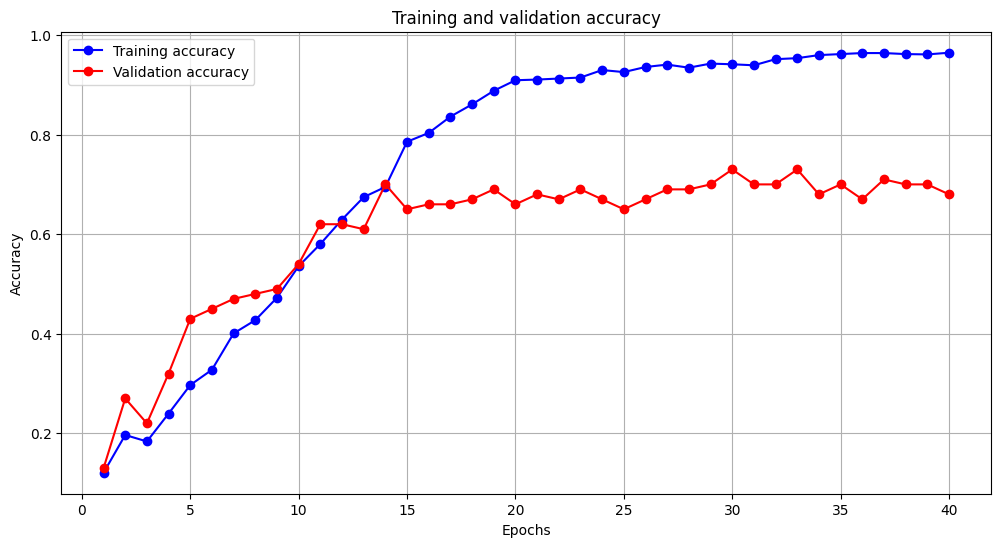

In [ ]:
# 학습 과정에서의 정확도와 검증 정확도 값을 combined_history 객체로부터 추출
acc = combined_history['accuracy']
val_acc = combined_history['val_accuracy']

# 에포크 값을 생성
epochs = range(1, len(acc) + 1)

# 정확도 플롯
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#############
## Model 3 ##
#############

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
# 모델 정의
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(height, width, 3))
model_ten = Sequential()
model_ten.add(base_model)
model_ten.add(Flatten())
model_ten.add(Dense(256, activation='relu'))
model_ten.add(Dropout(0.5))
model_ten.add(Dense(class_num, activation='softmax'))
# 모델 컴파일
model_ten.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model_ten.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               6422784   
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                2570      
                                                                 
Total params: 21140042 (80.64 MB)
Trainable params: 21140042 (80.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 정의
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(height, width, 3))
model_ten = Sequential()
model_ten.add(base_model)
model_ten.add(Flatten())
model_ten.add(Dense(256, activation='relu'))
model_ten.add(Dropout(0.5))
model_ten.add(Dense(class_num, activation='softmax'))
# 모델 컴파일
model_ten.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model_ten.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               6422784   
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                2570      
                                                                 
Total params: 21140042 (80.64 MB)
Trainable params: 21140042 (80.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 학습
history = model_ten.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator,
)

Epoch 1/15
46/46 [==============================] - 202s 4s/step - loss: 2.7067 - accuracy: 0.1386 - val_loss: 2.1987 - val_accuracy: 0.2100
Epoch 2/15
46/46 [==============================] - 199s 4s/step - loss: 2.1303 - accuracy: 0.2334 - val_loss: 2.1993 - val_accuracy: 0.2100
Epoch 3/15
46/46 [==============================] - 199s 4s/step - loss: 2.0081 - accuracy: 0.2983 - val_loss: 2.0547 - val_accuracy: 0.2900
Epoch 4/15
46/46 [==============================] - 199s 4s/step - loss: 1.9197 - accuracy: 0.3317 - val_loss: 1.9677 - val_accuracy: 0.3100
Epoch 5/15
46/46 [==============================] - 199s 4s/step - loss: 1.8053 - accuracy: 0.3802 - val_loss: 1.7082 - val_accuracy: 0.4200
Epoch 6/15
46/46 [==============================] - 199s 4s/step - loss: 1.6843 - accuracy: 0.4191 - val_loss: 1.7186 - val_accuracy: 0.4700
Epoch 7/15
46/46 [==============================] - 200s 4s/step - loss: 1.5773 - accuracy: 0.4464 - val_loss: 1.6702 - val_accuracy: 0.4100
Epoch 8/15
46

In [ ]:
# history 객체 초기화
combined_history = history.history

# 학습 2
add_history = model_ten.fit(
    train_generator,
    initial_epoch=15,
    epochs=20,
    validation_data=test_generator,
)

# 학습 2 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 16/20
46/46 [==============================] - 199s 4s/step - loss: 1.0027 - accuracy: 0.6519 - val_loss: 1.1752 - val_accuracy: 0.6200
Epoch 17/20
46/46 [==============================] - 199s 4s/step - loss: 0.9358 - accuracy: 0.6608 - val_loss: 1.2567 - val_accuracy: 0.6100
Epoch 18/20
46/46 [==============================] - 198s 4s/step - loss: 0.9960 - accuracy: 0.6519 - val_loss: 1.2597 - val_accuracy: 0.6100
Epoch 19/20
46/46 [==============================] - 198s 4s/step - loss: 0.8634 - accuracy: 0.7051 - val_loss: 1.2905 - val_accuracy: 0.5800
Epoch 20/20
46/46 [==============================] - 199s 4s/step - loss: 0.7767 - accuracy: 0.7406 - val_loss: 1.3446 - val_accuracy: 0.6500


In [ ]:
# 학습 3
add_history = model_ten.fit(
    train_generator,
    initial_epoch=20,
    epochs=25,
    validation_data=test_generator,
)

# 학습 3 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 21/25
46/46 [==============================] - 199s 4s/step - loss: 0.7206 - accuracy: 0.7556 - val_loss: 1.5574 - val_accuracy: 0.5800
Epoch 22/25
46/46 [==============================] - 199s 4s/step - loss: 0.7655 - accuracy: 0.7311 - val_loss: 1.2124 - val_accuracy: 0.5800
Epoch 23/25
46/46 [==============================] - 199s 4s/step - loss: 0.6165 - accuracy: 0.7870 - val_loss: 1.2258 - val_accuracy: 0.6300
Epoch 24/25
46/46 [==============================] - 199s 4s/step - loss: 0.7308 - accuracy: 0.7454 - val_loss: 1.5154 - val_accuracy: 0.6200
Epoch 25/25
46/46 [==============================] - 199s 4s/step - loss: 0.6683 - accuracy: 0.7584 - val_loss: 1.5622 - val_accuracy: 0.5600


In [ ]:
# 학습 4
add_history = model_ten.fit(
    train_generator,
    initial_epoch=25,
    epochs=35,
    validation_data=test_generator,
)

# 학습 4 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 26/35
46/46 [==============================] - 199s 4s/step - loss: 0.5330 - accuracy: 0.8068 - val_loss: 1.5243 - val_accuracy: 0.6200
Epoch 27/35
46/46 [==============================] - 199s 4s/step - loss: 0.5085 - accuracy: 0.8212 - val_loss: 1.7263 - val_accuracy: 0.6100
Epoch 28/35
46/46 [==============================] - 199s 4s/step - loss: 0.4969 - accuracy: 0.8348 - val_loss: 1.6834 - val_accuracy: 0.6000
Epoch 29/35
46/46 [==============================] - 199s 4s/step - loss: 0.4016 - accuracy: 0.8594 - val_loss: 1.8509 - val_accuracy: 0.5800
Epoch 30/35
46/46 [==============================] - 200s 4s/step - loss: 0.4399 - accuracy: 0.8621 - val_loss: 1.7144 - val_accuracy: 0.6400
Epoch 31/35
46/46 [==============================] - 199s 4s/step - loss: 0.4040 - accuracy: 0.8567 - val_loss: 2.5434 - val_accuracy: 0.5300
Epoch 32/35
46/46 [==============================] - 200s 4s/step - loss: 0.3446 - accuracy: 0.8853 - val_loss: 2.1073 - val_accuracy: 0.6400
Epoch 

In [ ]:
# 모델 학습
history = model_ten.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator,
)

Epoch 1/15
46/46 [==============================] - 202s 4s/step - loss: 2.7067 - accuracy: 0.1386 - val_loss: 2.1987 - val_accuracy: 0.2100
Epoch 2/15
46/46 [==============================] - 199s 4s/step - loss: 2.1303 - accuracy: 0.2334 - val_loss: 2.1993 - val_accuracy: 0.2100
Epoch 3/15
46/46 [==============================] - 199s 4s/step - loss: 2.0081 - accuracy: 0.2983 - val_loss: 2.0547 - val_accuracy: 0.2900
Epoch 4/15
46/46 [==============================] - 199s 4s/step - loss: 1.9197 - accuracy: 0.3317 - val_loss: 1.9677 - val_accuracy: 0.3100
Epoch 5/15
46/46 [==============================] - 199s 4s/step - loss: 1.8053 - accuracy: 0.3802 - val_loss: 1.7082 - val_accuracy: 0.4200
Epoch 6/15
46/46 [==============================] - 199s 4s/step - loss: 1.6843 - accuracy: 0.4191 - val_loss: 1.7186 - val_accuracy: 0.4700
Epoch 7/15
46/46 [==============================] - 200s 4s/step - loss: 1.5773 - accuracy: 0.4464 - val_loss: 1.6702 - val_accuracy: 0.4100
Epoch 8/15
46

In [ ]:
# history 객체 초기화
combined_history = history.history

# 학습 2
add_history = model_ten.fit(
    train_generator,
    initial_epoch=15,
    epochs=20,
    validation_data=test_generator,
)

# 학습 2 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 16/20
46/46 [==============================] - 199s 4s/step - loss: 1.0027 - accuracy: 0.6519 - val_loss: 1.1752 - val_accuracy: 0.6200
Epoch 17/20
46/46 [==============================] - 199s 4s/step - loss: 0.9358 - accuracy: 0.6608 - val_loss: 1.2567 - val_accuracy: 0.6100
Epoch 18/20
46/46 [==============================] - 198s 4s/step - loss: 0.9960 - accuracy: 0.6519 - val_loss: 1.2597 - val_accuracy: 0.6100
Epoch 19/20
46/46 [==============================] - 198s 4s/step - loss: 0.8634 - accuracy: 0.7051 - val_loss: 1.2905 - val_accuracy: 0.5800
Epoch 20/20
46/46 [==============================] - 199s 4s/step - loss: 0.7767 - accuracy: 0.7406 - val_loss: 1.3446 - val_accuracy: 0.6500


In [ ]:
# 학습 3
add_history = model_ten.fit(
    train_generator,
    initial_epoch=20,
    epochs=25,
    validation_data=test_generator,
)

# 학습 3 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 21/25
46/46 [==============================] - 199s 4s/step - loss: 0.7206 - accuracy: 0.7556 - val_loss: 1.5574 - val_accuracy: 0.5800
Epoch 22/25
46/46 [==============================] - 199s 4s/step - loss: 0.7655 - accuracy: 0.7311 - val_loss: 1.2124 - val_accuracy: 0.5800
Epoch 23/25
46/46 [==============================] - 199s 4s/step - loss: 0.6165 - accuracy: 0.7870 - val_loss: 1.2258 - val_accuracy: 0.6300
Epoch 24/25
46/46 [==============================] - 199s 4s/step - loss: 0.7308 - accuracy: 0.7454 - val_loss: 1.5154 - val_accuracy: 0.6200
Epoch 25/25
46/46 [==============================] - 199s 4s/step - loss: 0.6683 - accuracy: 0.7584 - val_loss: 1.5622 - val_accuracy: 0.5600


In [ ]:
# 학습 4
add_history = model_ten.fit(
    train_generator,
    initial_epoch=25,
    epochs=35,
    validation_data=test_generator,
)

# 학습 4 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 26/35
46/46 [==============================] - 199s 4s/step - loss: 0.5330 - accuracy: 0.8068 - val_loss: 1.5243 - val_accuracy: 0.6200
Epoch 27/35
46/46 [==============================] - 199s 4s/step - loss: 0.5085 - accuracy: 0.8212 - val_loss: 1.7263 - val_accuracy: 0.6100
Epoch 28/35
46/46 [==============================] - 199s 4s/step - loss: 0.4969 - accuracy: 0.8348 - val_loss: 1.6834 - val_accuracy: 0.6000
Epoch 29/35
46/46 [==============================] - 199s 4s/step - loss: 0.4016 - accuracy: 0.8594 - val_loss: 1.8509 - val_accuracy: 0.5800
Epoch 30/35
46/46 [==============================] - 200s 4s/step - loss: 0.4399 - accuracy: 0.8621 - val_loss: 1.7144 - val_accuracy: 0.6400
Epoch 31/35
46/46 [==============================] - 199s 4s/step - loss: 0.4040 - accuracy: 0.8567 - val_loss: 2.5434 - val_accuracy: 0.5300
Epoch 32/35
46/46 [==============================] - 200s 4s/step - loss: 0.3446 - accuracy: 0.8853 - val_loss: 2.1073 - val_accuracy: 0.6400
Epoch 

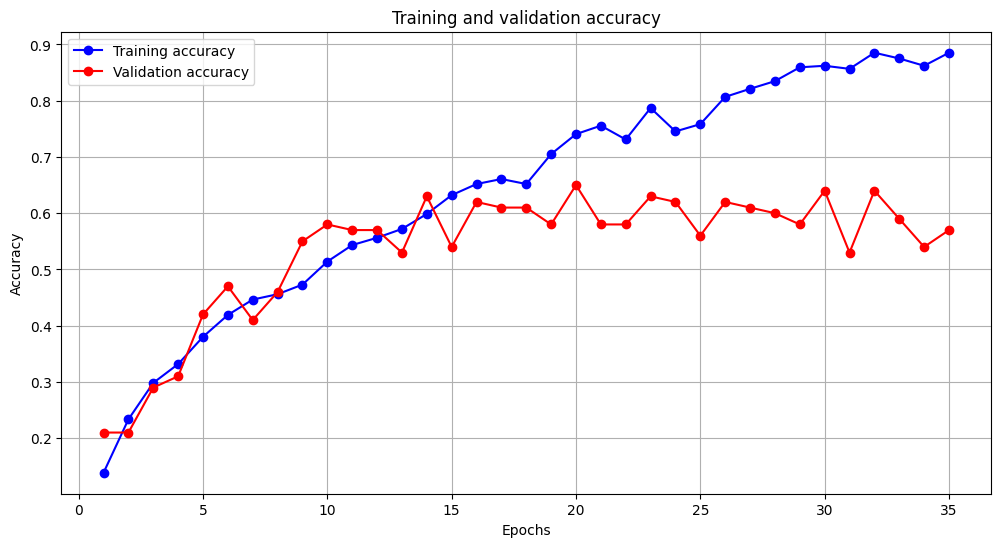

In [ ]:
# 학습 과정에서의 정확도와 검증 정확도 값을 combined_history 객체로부터 추출
acc = combined_history['accuracy']
val_acc = combined_history['val_accuracy']

# 에포크 값을 생성
epochs = range(1, len(acc) + 1)

# 정확도 플롯
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#############
## Model 4 ##
#############

In [ ]:
# 이미지 크기 설정
width, height = 64, 64
class_num = 10

# 데이터 증강 및 전처리
train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    rescale=1/255.0,
)

# 트레이닝 데이터 로드
train_generator = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Deep_Learning/100_Sports_Image_Classification/train_ten',
    target_size=(width, height),
    class_mode='categorical',
    batch_size=16
)

# 테스트 데이터 로드
test_generator = test_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Deep_Learning/100_Sports_Image_Classification/test_ten',
    target_size=(width, height),
    class_mode='categorical',
    batch_size=16,
    shuffle=False
)

Found 1465 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [ ]:
# 모델 정의
model_ten = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(height, width, 3)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='tanh'),
    Dense(class_num, activation='softmax')
])
# 모델 컴파일
model_ten.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model_ten.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 conv2d_31 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 30, 30, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 28, 28, 256)       295168    
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 14, 14, 256)       0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 50176)           

In [ ]:
# 모델 학습
history = model_ten.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

Epoch 1/15
92/92 [==============================] - 11s 109ms/step - loss: 2.1607 - accuracy: 0.2164 - val_loss: 1.9844 - val_accuracy: 0.3200
Epoch 2/15
92/92 [==============================] - 10s 106ms/step - loss: 1.8447 - accuracy: 0.4102 - val_loss: 1.7206 - val_accuracy: 0.4500
Epoch 3/15
92/92 [==============================] - 10s 106ms/step - loss: 1.6144 - accuracy: 0.4853 - val_loss: 1.5444 - val_accuracy: 0.5200
Epoch 4/15
92/92 [==============================] - 10s 108ms/step - loss: 1.4629 - accuracy: 0.5399 - val_loss: 1.3946 - val_accuracy: 0.5900
Epoch 5/15
92/92 [==============================] - 10s 107ms/step - loss: 1.3672 - accuracy: 0.5679 - val_loss: 1.2647 - val_accuracy: 0.6100
Epoch 6/15
92/92 [==============================] - 10s 108ms/step - loss: 1.2327 - accuracy: 0.6232 - val_loss: 1.3320 - val_accuracy: 0.5100
Epoch 7/15
92/92 [==============================] - 10s 107ms/step - loss: 1.1907 - accuracy: 0.6348 - val_loss: 1.1630 - val_accuracy: 0.6300

In [ ]:
# history 객체 초기화
combined_history = history.history

# 두번째 학습
add_history = model_ten.fit(
    train_generator,
    initial_epoch=15,
    epochs=25,
    validation_data=test_generator,
)

# 두번째 학습 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 16/25
92/92 [==============================] - 10s 107ms/step - loss: 0.7979 - accuracy: 0.7672 - val_loss: 1.1055 - val_accuracy: 0.6800
Epoch 17/25
92/92 [==============================] - 10s 106ms/step - loss: 0.7375 - accuracy: 0.7836 - val_loss: 1.0111 - val_accuracy: 0.6700
Epoch 18/25
92/92 [==============================] - 10s 107ms/step - loss: 0.7270 - accuracy: 0.7904 - val_loss: 0.9729 - val_accuracy: 0.6900
Epoch 19/25
92/92 [==============================] - 10s 107ms/step - loss: 0.6806 - accuracy: 0.8020 - val_loss: 0.8795 - val_accuracy: 0.7200
Epoch 20/25
92/92 [==============================] - 10s 108ms/step - loss: 0.6639 - accuracy: 0.8075 - val_loss: 1.0040 - val_accuracy: 0.6900
Epoch 21/25
92/92 [==============================] - 10s 107ms/step - loss: 0.6385 - accuracy: 0.8239 - val_loss: 1.0979 - val_accuracy: 0.6800
Epoch 22/25
92/92 [==============================] - 10s 107ms/step - loss: 0.6049 - accuracy: 0.8314 - val_loss: 0.9608 - val_accuracy:

In [ ]:
# 세번째 학습
add_history = model_ten.fit(
    train_generator,
    initial_epoch=25,
    epochs=27,
    validation_data=test_generator,
)

# 세번째 학습 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 26/27
92/92 [==============================] - 10s 108ms/step - loss: 0.5161 - accuracy: 0.8580 - val_loss: 0.9165 - val_accuracy: 0.7300
Epoch 27/27
92/92 [==============================] - 10s 107ms/step - loss: 0.5216 - accuracy: 0.8512 - val_loss: 1.0541 - val_accuracy: 0.6800


In [ ]:
# 네번째 학습
add_history = model_ten.fit(
    train_generator,
    initial_epoch=27,
    epochs=28,
    validation_data=test_generator,
)

# 네번째 학습 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 28/28
92/92 [==============================] - 10s 107ms/step - loss: 0.4840 - accuracy: 0.8751 - val_loss: 0.9326 - val_accuracy: 0.7300


In [ ]:
# 다섯 번째 학습
add_history = model_ten.fit(
    train_generator,
    initial_epoch=28,
    epochs=30,
    validation_data=test_generator,
)

# 다섯 번째 학습 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 29/30
92/92 [==============================] - 10s 108ms/step - loss: 0.4588 - accuracy: 0.8833 - val_loss: 0.8534 - val_accuracy: 0.7300
Epoch 30/30
92/92 [==============================] - 10s 107ms/step - loss: 0.4814 - accuracy: 0.8703 - val_loss: 0.7595 - val_accuracy: 0.7800


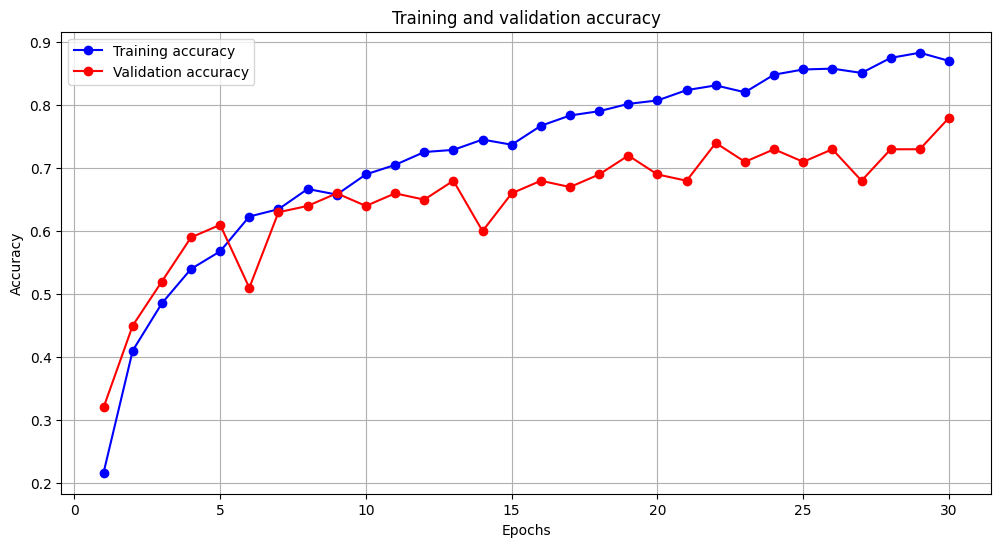

In [ ]:
# 학습 과정에서의 정확도와 검증 정확도 값을 combined_history 객체로부터 추출
acc = combined_history['accuracy']
val_acc = combined_history['val_accuracy']

# 에포크 값을 생성
epochs = range(1, len(acc) + 1)

# 정확도 플롯
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#####################
## Model 5 (Final) ##
#####################

In [ ]:
# 이미지 크기 설정
width, height = 36,36
class_num = 10

# 데이터 증강 및 전처리
train_datagen = ImageDataGenerator(rescale=1/255.0)

test_datagen = ImageDataGenerator(rescale=1/255.0,)

# 트레이닝 데이터 로드
train_generator = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Deep_Learning/100_Sports_Image_Classification/train_ten',
    target_size=(width, height),
    class_mode='categorical',
    batch_size=32
)

# 테스트 데이터 로드
test_generator = test_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Deep_Learning/100_Sports_Image_Classification/test_ten',
    target_size=(width, height),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1465 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [ ]:
# 모델 정의
model_ten = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(height, width, 3)),
    BatchNormalization(),
    ReLU(),
    MaxPool2D((2, 2), strides=(2,2)),
    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPool2D((2, 2), strides=(2,2)),
    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPool2D((2, 2), strides=(2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(class_num, activation='softmax')
])
# 모델 컴파일
model_ten.compile(optimizer=Adam(learning_rate=0.0002), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model_ten.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 36, 36, 32)        896       
                                                                 
 batch_normalization_22 (Ba  (None, 36, 36, 32)        128       
 tchNormalization)                                               
                                                                 
 re_lu_22 (ReLU)             (None, 36, 36, 32)        0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 18, 18, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 18, 18, 64)        18496     
                                                                 
 batch_normalization_23 (Ba  (None, 18, 18, 64)       

In [ ]:
# 모델 학습
history = model_ten.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

Epoch 1/15
46/46 [==============================] - 7s 111ms/step - loss: 2.5550 - accuracy: 0.1666 - val_loss: 2.2924 - val_accuracy: 0.1000
Epoch 2/15
46/46 [==============================] - 5s 104ms/step - loss: 2.1172 - accuracy: 0.2457 - val_loss: 2.2820 - val_accuracy: 0.1000
Epoch 3/15
46/46 [==============================] - 5s 100ms/step - loss: 1.9673 - accuracy: 0.3167 - val_loss: 2.2977 - val_accuracy: 0.1500
Epoch 4/15
46/46 [==============================] - 5s 102ms/step - loss: 1.8596 - accuracy: 0.3461 - val_loss: 2.4010 - val_accuracy: 0.1200
Epoch 5/15
46/46 [==============================] - 5s 101ms/step - loss: 1.7808 - accuracy: 0.3802 - val_loss: 2.3191 - val_accuracy: 0.1700
Epoch 6/15
46/46 [==============================] - 5s 101ms/step - loss: 1.6822 - accuracy: 0.4164 - val_loss: 2.3625 - val_accuracy: 0.1700
Epoch 7/15
46/46 [==============================] - 5s 101ms/step - loss: 1.6162 - accuracy: 0.4526 - val_loss: 2.1994 - val_accuracy: 0.2400
Epoch 

In [ ]:
# history 객체 초기화
combined_history = history.history

# 두번째 학습
add_history = model_ten.fit(
    train_generator,
    initial_epoch=15,
    epochs=20,
    validation_data=test_generator,
)

# 두번째 학습 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 16/20
46/46 [==============================] - 5s 107ms/step - loss: 0.9506 - accuracy: 0.6703 - val_loss: 0.9454 - val_accuracy: 0.7200
Epoch 17/20
46/46 [==============================] - 5s 100ms/step - loss: 0.9371 - accuracy: 0.7160 - val_loss: 0.9725 - val_accuracy: 0.6900
Epoch 18/20
46/46 [==============================] - 5s 101ms/step - loss: 0.8604 - accuracy: 0.7058 - val_loss: 0.9189 - val_accuracy: 0.7000
Epoch 19/20
46/46 [==============================] - 5s 107ms/step - loss: 0.8928 - accuracy: 0.7174 - val_loss: 0.9083 - val_accuracy: 0.7400
Epoch 20/20
46/46 [==============================] - 5s 106ms/step - loss: 0.7806 - accuracy: 0.7454 - val_loss: 0.8090 - val_accuracy: 0.7600


In [ ]:
# 세번째 학습
add_history = model_ten.fit(
    train_generator,
    initial_epoch=20,
    epochs=25,
    validation_data=test_generator,
)

# 세번째 학습 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 21/25
46/46 [==============================] - 5s 108ms/step - loss: 0.7659 - accuracy: 0.7502 - val_loss: 0.9281 - val_accuracy: 0.7100
Epoch 22/25
46/46 [==============================] - 5s 105ms/step - loss: 0.6769 - accuracy: 0.7863 - val_loss: 0.8537 - val_accuracy: 0.7400
Epoch 23/25
46/46 [==============================] - 5s 101ms/step - loss: 0.6351 - accuracy: 0.8027 - val_loss: 0.7942 - val_accuracy: 0.7700
Epoch 24/25
46/46 [==============================] - 5s 105ms/step - loss: 0.6146 - accuracy: 0.7973 - val_loss: 0.9252 - val_accuracy: 0.7000
Epoch 25/25
46/46 [==============================] - 5s 101ms/step - loss: 0.6038 - accuracy: 0.8123 - val_loss: 0.8896 - val_accuracy: 0.7000


In [ ]:
# 네번째 학습
add_history = model_ten.fit(
    train_generator,
    initial_epoch=25,
    epochs=30,
    validation_data=test_generator,
)

# 네번째 학습 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 26/30
46/46 [==============================] - 5s 107ms/step - loss: 0.5343 - accuracy: 0.8191 - val_loss: 0.7301 - val_accuracy: 0.7800
Epoch 27/30
46/46 [==============================] - 5s 101ms/step - loss: 0.4850 - accuracy: 0.8567 - val_loss: 0.8058 - val_accuracy: 0.7500
Epoch 28/30
46/46 [==============================] - 5s 101ms/step - loss: 0.4564 - accuracy: 0.8485 - val_loss: 0.7855 - val_accuracy: 0.7600
Epoch 29/30
46/46 [==============================] - 5s 102ms/step - loss: 0.4420 - accuracy: 0.8553 - val_loss: 0.7665 - val_accuracy: 0.7600
Epoch 30/30
46/46 [==============================] - 5s 107ms/step - loss: 0.4268 - accuracy: 0.8662 - val_loss: 0.7715 - val_accuracy: 0.7700


In [ ]:
# 다섯 번째 학습
add_history = model_ten.fit(
    train_generator,
    initial_epoch=30,
    epochs=31,
    validation_data=test_generator,
)

# 다섯 번째 학습 결과를 combined_history에 추가
for key in combined_history.keys():
    combined_history[key].extend(add_history.history[key])

Epoch 31/31
46/46 [==============================] - 5s 105ms/step - loss: 0.3887 - accuracy: 0.8792 - val_loss: 0.6410 - val_accuracy: 0.8100


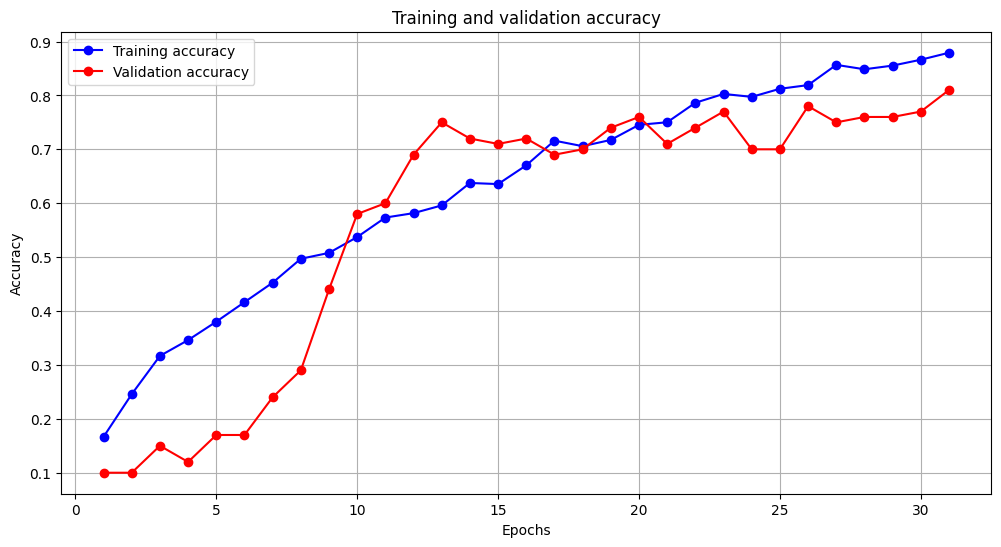

In [ ]:
# 학습 과정에서의 정확도와 검증 정확도 값을 combined_history 객체로부터 추출
acc = combined_history['accuracy']
val_acc = combined_history['val_accuracy']

# 에포크 값을 생성
epochs = range(1, len(acc) + 1)

# 정확도 플롯
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# test 데이터셋에 대한 예측
test_generator.reset()
valid_preds = model_ten.predict(test_generator)
valid_preds = np.argmax(valid_preds, axis=1)

# 실제 라벨
valid_true = test_generator.classes

# 분류 리포트 생성
valid_report = classification_report(valid_true, valid_preds, target_names=list(test_generator.class_indices.keys()))
print(valid_report)

4/4 [==============================] - 0s 67ms/step
               precision    recall  f1-score   support

      fencing       0.73      0.80      0.76        10
         golf       0.89      0.80      0.84        10
       hockey       1.00      1.00      1.00        10
        rugby       0.67      1.00      0.80        10
  ski jumping       0.89      0.80      0.84        10
     swimming       0.82      0.90      0.86        10
 table tennis       0.89      0.80      0.84        10
       tennis       1.00      0.50      0.67        10
   volleyball       0.58      0.70      0.64        10
weightlifting       0.89      0.80      0.84        10

     accuracy                           0.81       100
    macro avg       0.84      0.81      0.81       100
 weighted avg       0.84      0.81      0.81       100



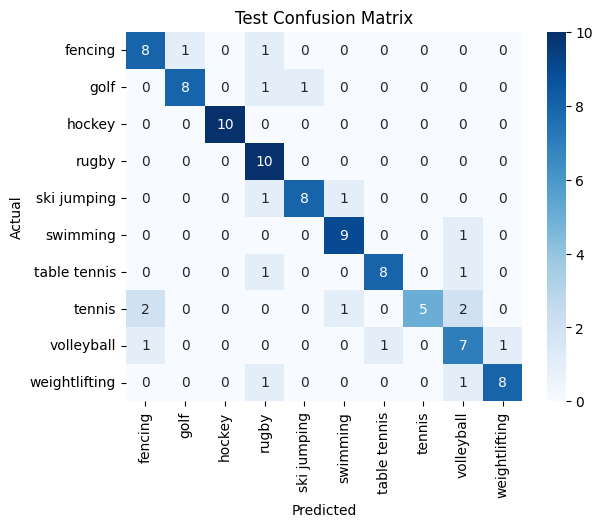

{'fencing': 0, 'golf': 1, 'hockey': 2, 'rugby': 3, 'ski jumping': 4, 'swimming': 5, 'table tennis': 6, 'tennis': 7, 'volleyball': 8, 'weightlifting': 9}


In [ ]:
# 혼동 행렬 생성
valid_cm = confusion_matrix(valid_true, valid_preds)
sns.heatmap(valid_cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_generator.class_indices.keys()), yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()

# 클래스 인덱스 확인
print(test_generator.class_indices)

1/1 [==============================] - 0s 27ms/step


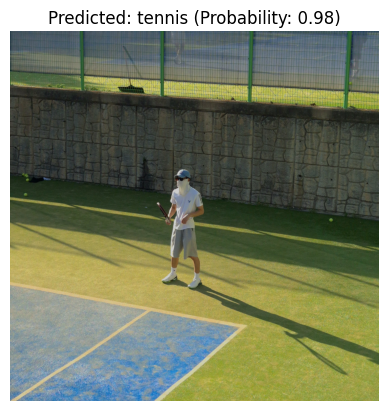

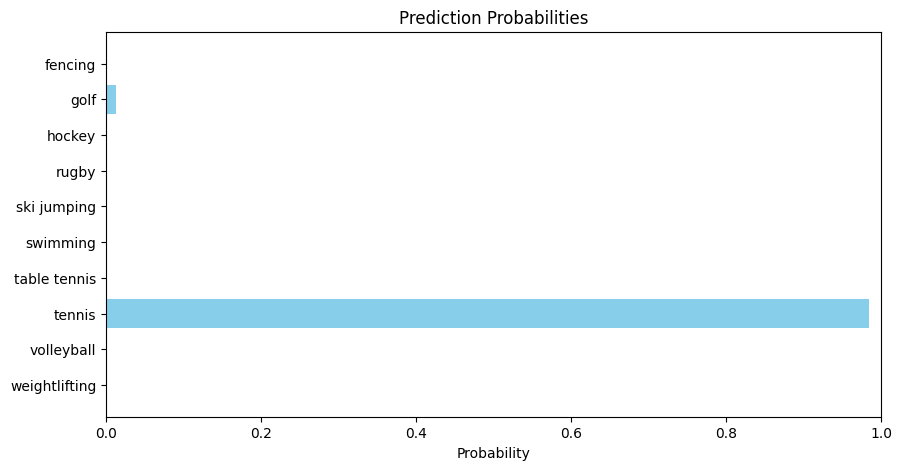

In [ ]:
# 이미지 전처리 함수
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(height, width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img_array

# 이미지 예측 함수
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    preds = model_ten.predict(img_array)
    pred_class_idx = np.argmax(preds, axis=1)[0]
    pred_class = list(test_generator.class_indices.keys())[pred_class_idx]
    pred_prob = preds[0][pred_class_idx]  # 예측 확률 값

    # 이미지 표시
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f'Predicted: {pred_class} (Probability: {pred_prob:.2f})')
    plt.axis('off')
    plt.show()

    # 확률 분포 표시
    class_labels = list(test_generator.class_indices.keys())
    plt.figure(figsize=(10, 5))
    plt.barh(class_labels, preds[0], color='skyblue')
    plt.xlabel('Probability')
    plt.title('Prediction Probabilities')
    plt.xlim([0, 1])
    plt.gca().invert_yaxis()
    plt.show()

# 예시로 사용할 이미지 경로
img_path = '/content/drive/MyDrive/Deep_Learning/100_Sports_Image_Classification/tennis.jpg'
predict_image(img_path)

1/1 [==============================] - 0s 25ms/step


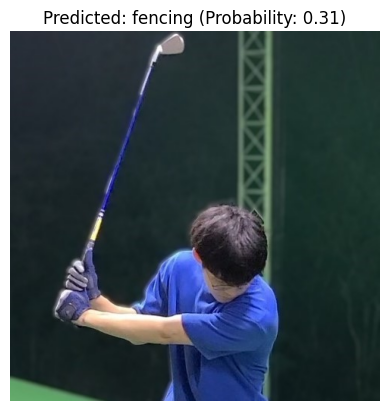

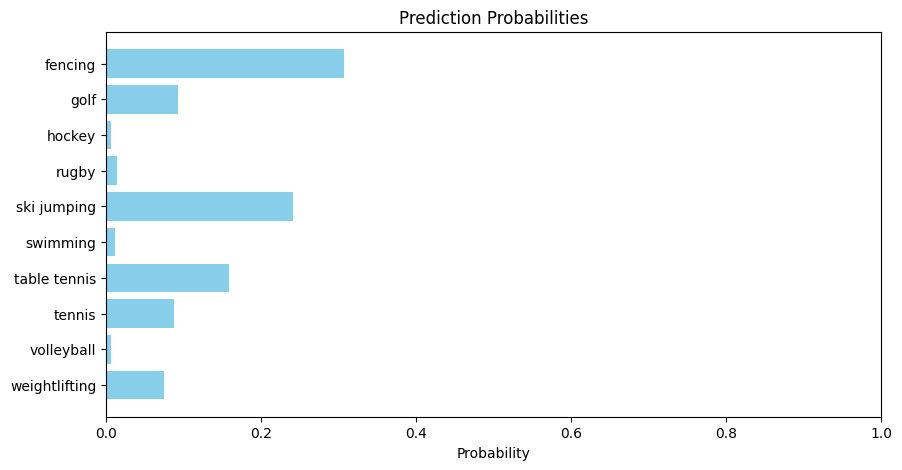

In [ ]:
img_path2 = '/content/drive/MyDrive/Deep_Learning/100_Sports_Image_Classification/golf2.jpg'
predict_image(img_path2)

1/1 [==============================] - 0s 26ms/step


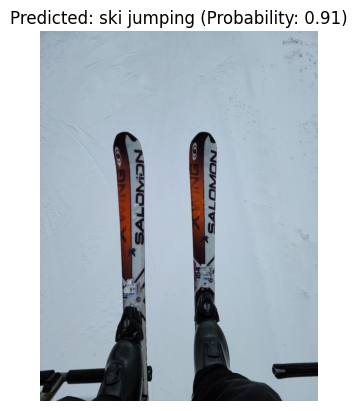

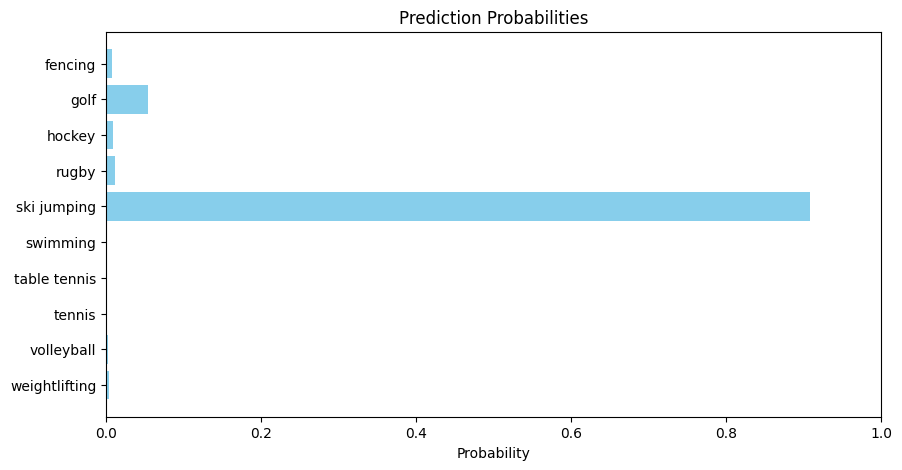

In [ ]:
img_path3 = '/content/drive/MyDrive/Deep_Learning/100_Sports_Image_Classification/ski.jpg'
predict_image(img_path3)

1/1 [==============================] - 0s 25ms/step


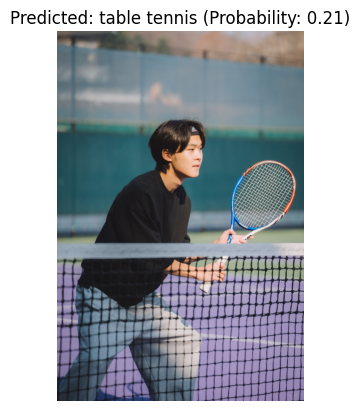

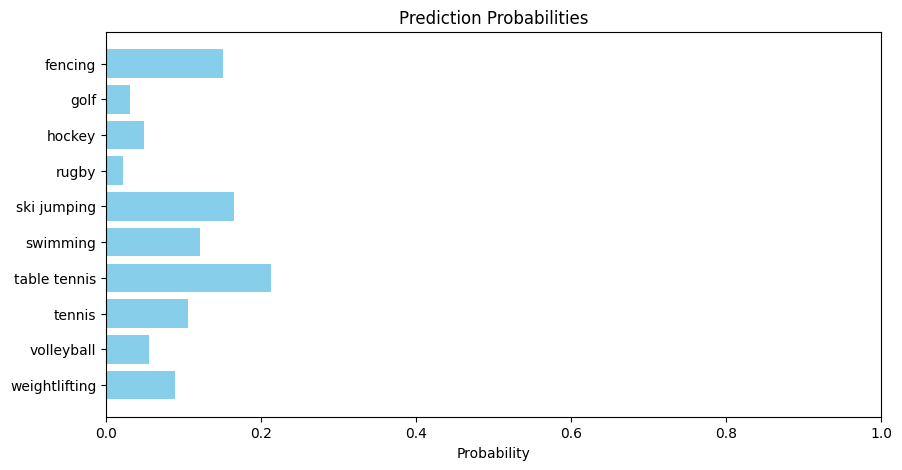

In [ ]:
img_path4 = '/content/drive/MyDrive/Deep_Learning/100_Sports_Image_Classification/tennis2.jpg'
predict_image(img_path4)